## Car Brand Classification - ResNet50 - Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#from keras.applications.vgg16 import VGG16

In [ ]:
# Re-size all the images to this size [224, 224]
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Train'
valid_path = '/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Test'

In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3],   # RGB Channels hence we add [3].
                  weights='imagenet',             # Same Weights will be used as of ResNet 50.
                  include_top=False)              # Remove first & last layer because we only have 3 classes.

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Don't train existing weights --> WE HAVE TO RE-USE THOSE WEIGHTS AND NOT RE-TRAIN THEM.

for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# Useful for getting number of output classes
folders = glob('/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Train/*')

In [ ]:
# Our custom layers - You can add more layers if you want.
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# View the structure of the our custom Model

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# Defining the cost, optimization method and metrics to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset and applying Data Augmentation.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Test Data should never be augmented as these are the real time data we recieve.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as intialized for the image size
# 'class_mode' is categorical for multi class classification for 2 classes it is 'binary'

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
len(training_set)

2

In [ ]:
# Fitting the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 21s 11s/step - loss: 4.0967 - accuracy: 0.4219 - val_loss: 15.8402 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 337ms/step - loss: 9.5838 - accuracy: 0.3438 - val_loss: 2.5983 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 335ms/step - loss: 4.0626 - accuracy: 0.3906 - val_loss: 3.5138 - val_accuracy: 0.5690
Epoch 4/50
2/2 [==============================] - 1s 327ms/step - loss: 6.2485 - accuracy: 0.4219 - val_loss: 3.1170 - val_accuracy: 0.5517
Epoch 5/50
2/2 [==============================] - 1s 328ms/step - loss: 4.4436 - accuracy: 0.4531 - val_loss: 1.5188 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 1s 327ms/step - loss: 1.2631 - accuracy: 0.5312 - val_loss: 4.8723 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 333ms/step - loss: 3.3191 - accuracy: 0.4219 - val_loss: 3.2973 - val_accuracy: 0.3621
Epoch 8/50
2/2 [====

In [ ]:
r.history

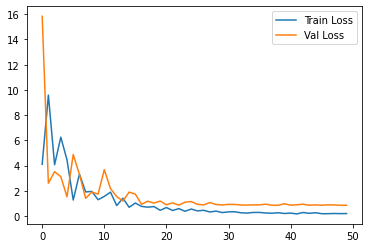

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

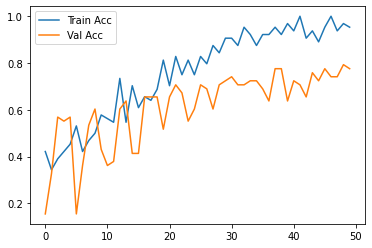

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy

plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Save the model as .h5 file.
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
# Predictions for the test set

y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[7.02819601e-02, 7.69207954e-01, 1.60510138e-01],
       [9.81383264e-01, 1.13676246e-02, 7.24918954e-03],
       [6.21681511e-02, 1.65890064e-02, 9.21242833e-01],
       [2.14989686e-05, 6.93818205e-04, 9.99284685e-01],
       [4.71407641e-03, 3.73338647e-02, 9.57952082e-01],
       [1.18429296e-01, 9.29799825e-02, 7.88590670e-01],
       [3.13816741e-02, 8.36294949e-01, 1.32323340e-01],
       [5.99095561e-02, 3.43336607e-03, 9.36657071e-01],
       [6.75248146e-01, 2.67554671e-01, 5.71971089e-02],
       [6.20293058e-02, 4.61036295e-01, 4.76934373e-01],
       [2.34900974e-02, 8.37979138e-01, 1.38530746e-01],
       [3.28303277e-02, 7.88851559e-01, 1.78318113e-01],
       [5.05723834e-01, 6.31388649e-02, 4.31137323e-01],
       [4.44151192e-05, 9.98445928e-01, 1.50974107e-03],
       [9.70029924e-03, 9.42099750e-01, 4.81998883e-02],
       [2.08190843e-01, 5.45021951e-01, 2.46787280e-01],
       [1.00302510e-03, 9.96992230e-01, 2.00475263e-03],
       [8.80047772e-03, 4.97494

In [ ]:
# Converting the values into the class label values.

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2])

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
# Prediction for 1 image

img = image.load_img('/content/drive/My Drive/Deep Learning Materials/Car Brand - Deep Learning Project/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
# Converting the image into an array.

x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
# 224px * 224px * 3 'RGB' channels

x.shape

(224, 224, 3)

In [ ]:
# Scaling the image to provide it to the model

x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         ...,
         [0.76862746, 0.73333335, 0.6745098 ],
         [0.8509804 , 0.8156863 , 0.75686276],
         [0.9529412 , 0.91764706, 0.85882354]],

        [[0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         ...,
         [0.9607843 , 0.9607843 , 0.92941177],
         [0.9529412 , 0.9529412 , 0.92156863],
         [0.9490196 , 0.9490196 , 0.91764706]],

        [[0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         ...,
         [0.9411765 , 0.9764706 , 0.972549  ],
         [0.9490196 , 0.9843137 , 0.98039216],
         [0.9490196 , 0.9843137 , 0.98039216]],

        ...,

        [[0.7411765 , 0.8117647 , 0.8980392 ],
         [0.74509805, 0.80784315, 0.8980392 ]

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.38774922, 0.04007578, 0.57217497]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])